Decision Tree Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79       151
         1.0       0.60      0.62      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



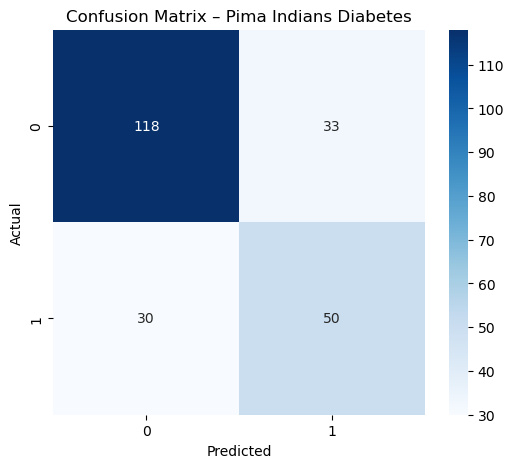

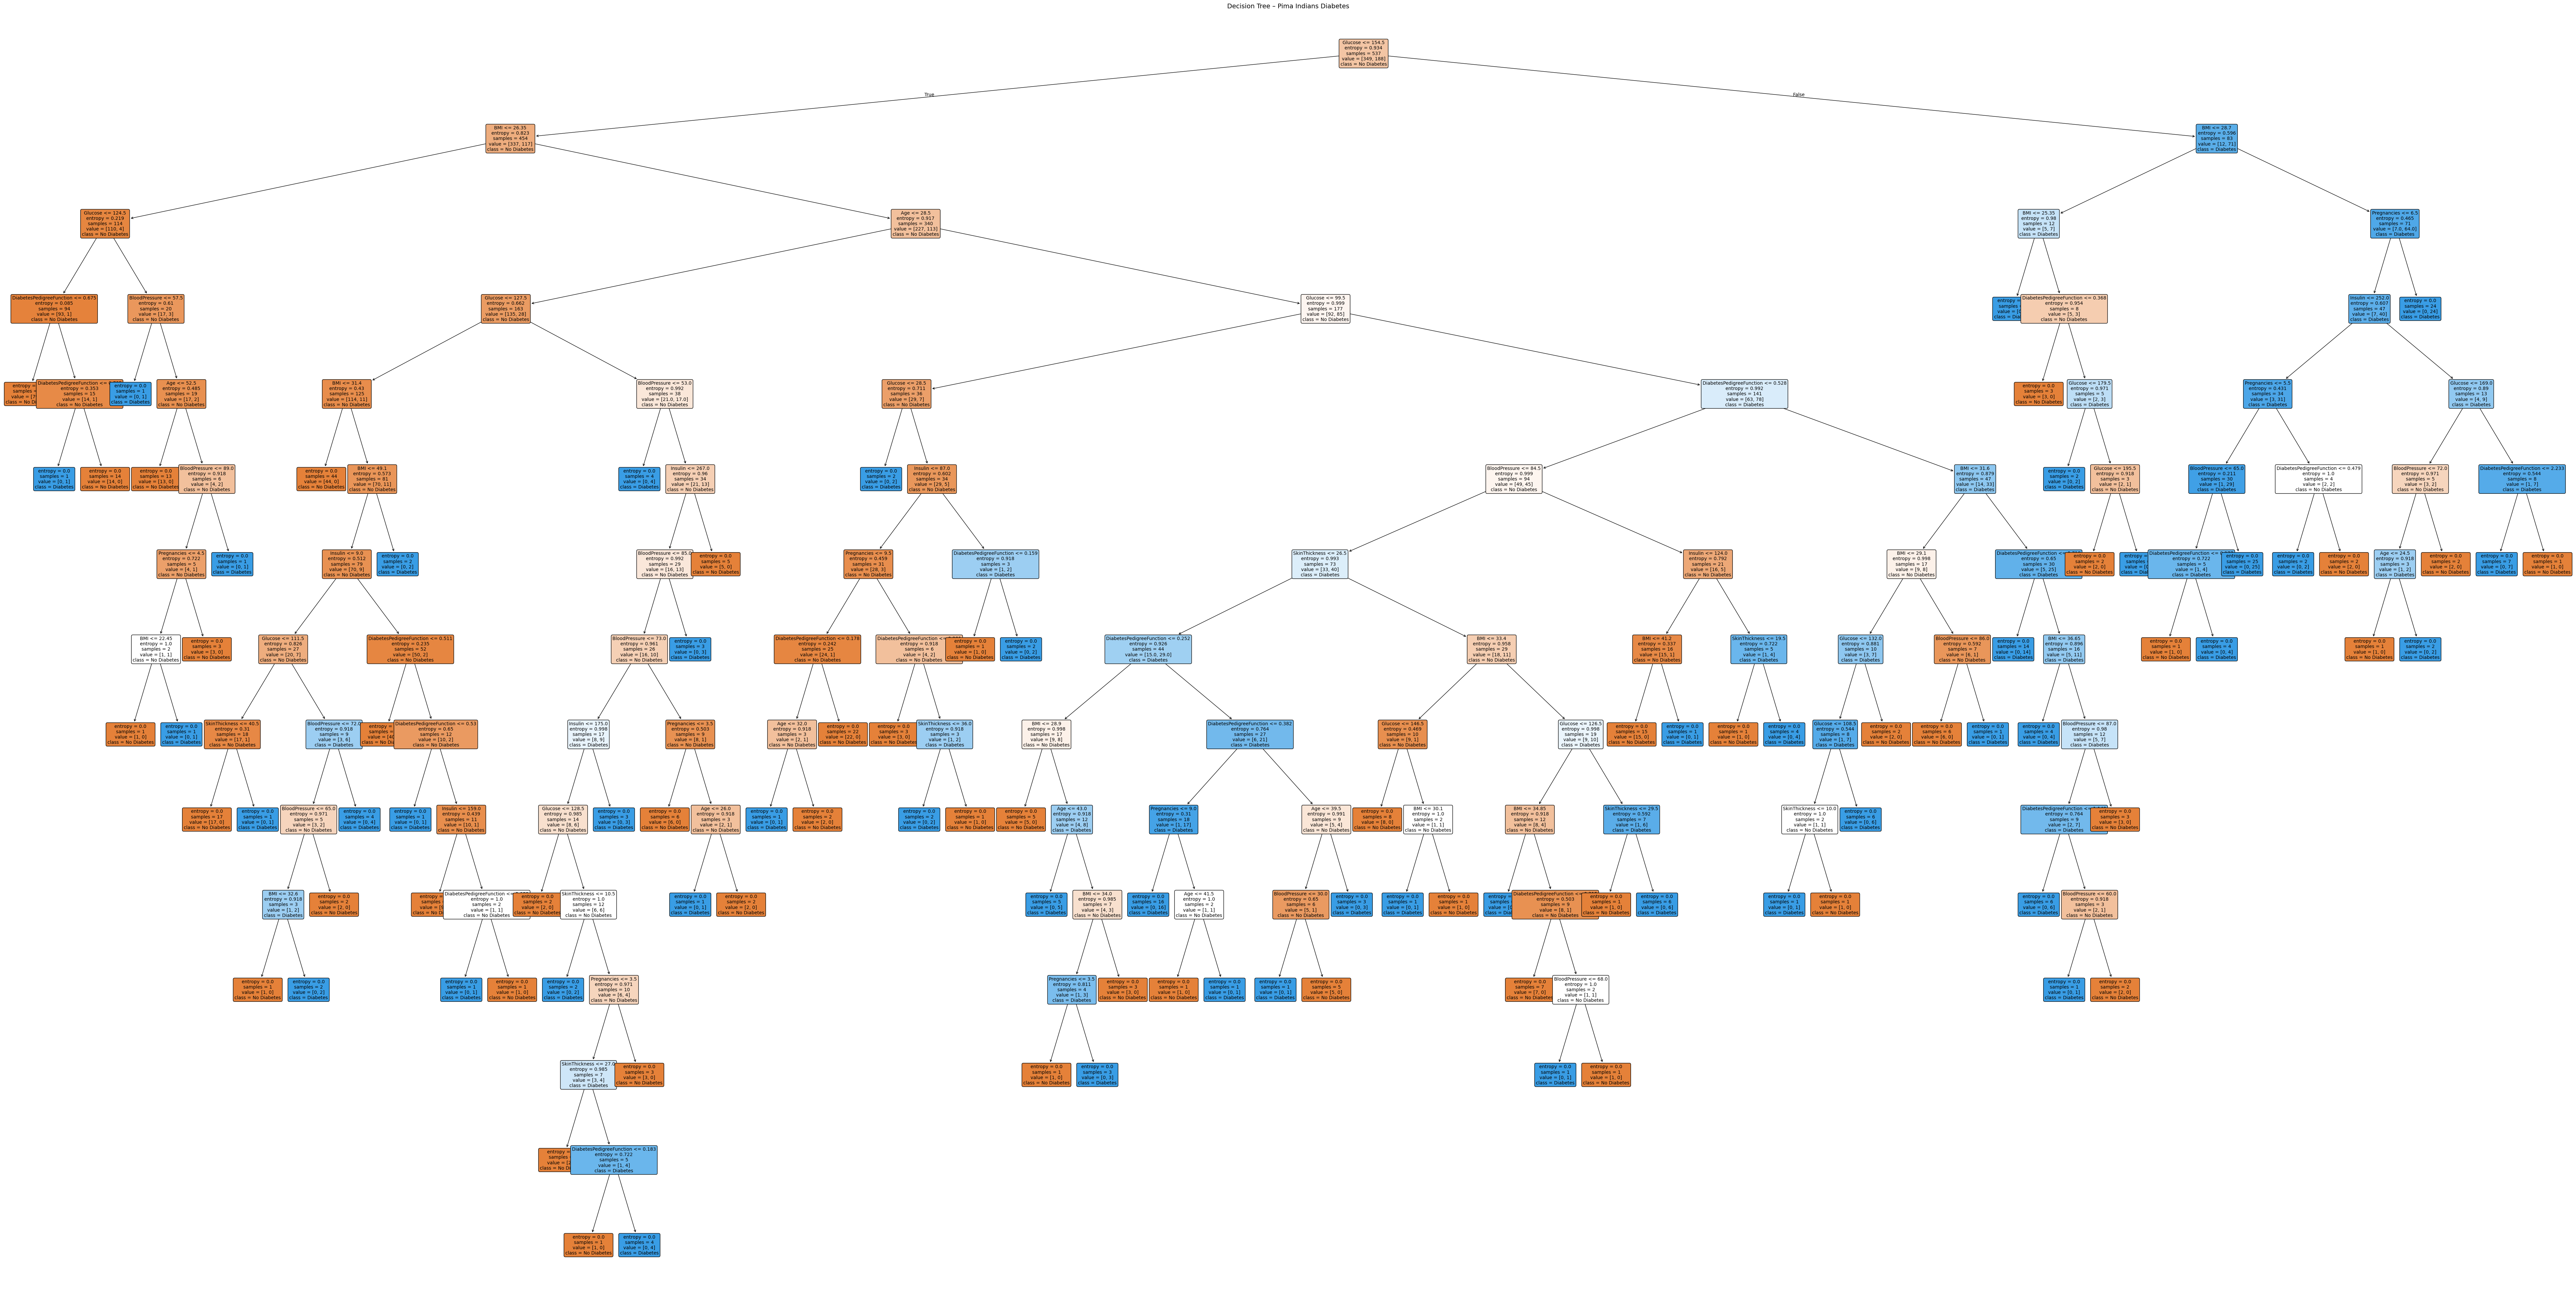

In [7]:
# Decision Tree Classification – Pima Indians Diabetes (Fixed + Visualized)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# -----------------------------
# Load dataset with headers
# -----------------------------
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv("pima-indians-diabetes.csv", names=column_names)

# -----------------------------
# Data Preprocessing
# -----------------------------
df = df.dropna()  # remove missing rows if any

# Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -----------------------------
# Train Decision Tree
# -----------------------------
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -----------------------------
# Evaluation
# -----------------------------
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix – Pima Indians Diabetes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -----------------------------
# Decision Tree Visualization
# -----------------------------
plt.figure(figsize=(100, 50))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree – Pima Indians Diabetes", fontsize=14)
plt.show()
